<a href="https://colab.research.google.com/github/yasinahmadpoor/Breast_Cancer_Wisconsin_DataSet/blob/main/Breast_Cancer_Wisconsin_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle    # Install the Kaggle library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle        # Make a directory named “.kaggle”

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/         # Copy the “kaggle.json” into this new directory

In [6]:
! chmod 600 ~/.kaggle/kaggle.json        # Allocate the required permission for this file.

In [10]:
! kaggle datasets download uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 35.4MB/s]


In [14]:
! unzip breast-cancer-wisconsin-data

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [47]:
data = pd.read_csv('/content/data.csv', usecols = [i for i in range(32)])

In [48]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
print(f'number of rows: {data.shape[0]} \nnumber of columns: {data.shape[1]}')

number of rows: 569 
number of columns: 32


In [50]:
print(f'number of nan values ---> {data.isna().sum().sum()}')

number of nan values ---> 0


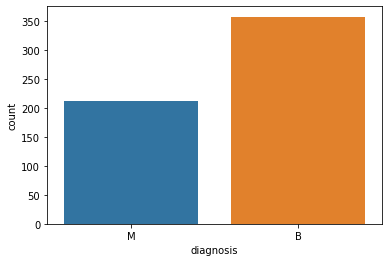

In [51]:
sns.countplot(data['diagnosis'])
plt.show()

In [52]:
# convert categorical column to numerical
data['diagnosis'] = data['diagnosis'].apply(lambda x:0 if x == 'M' else 1)

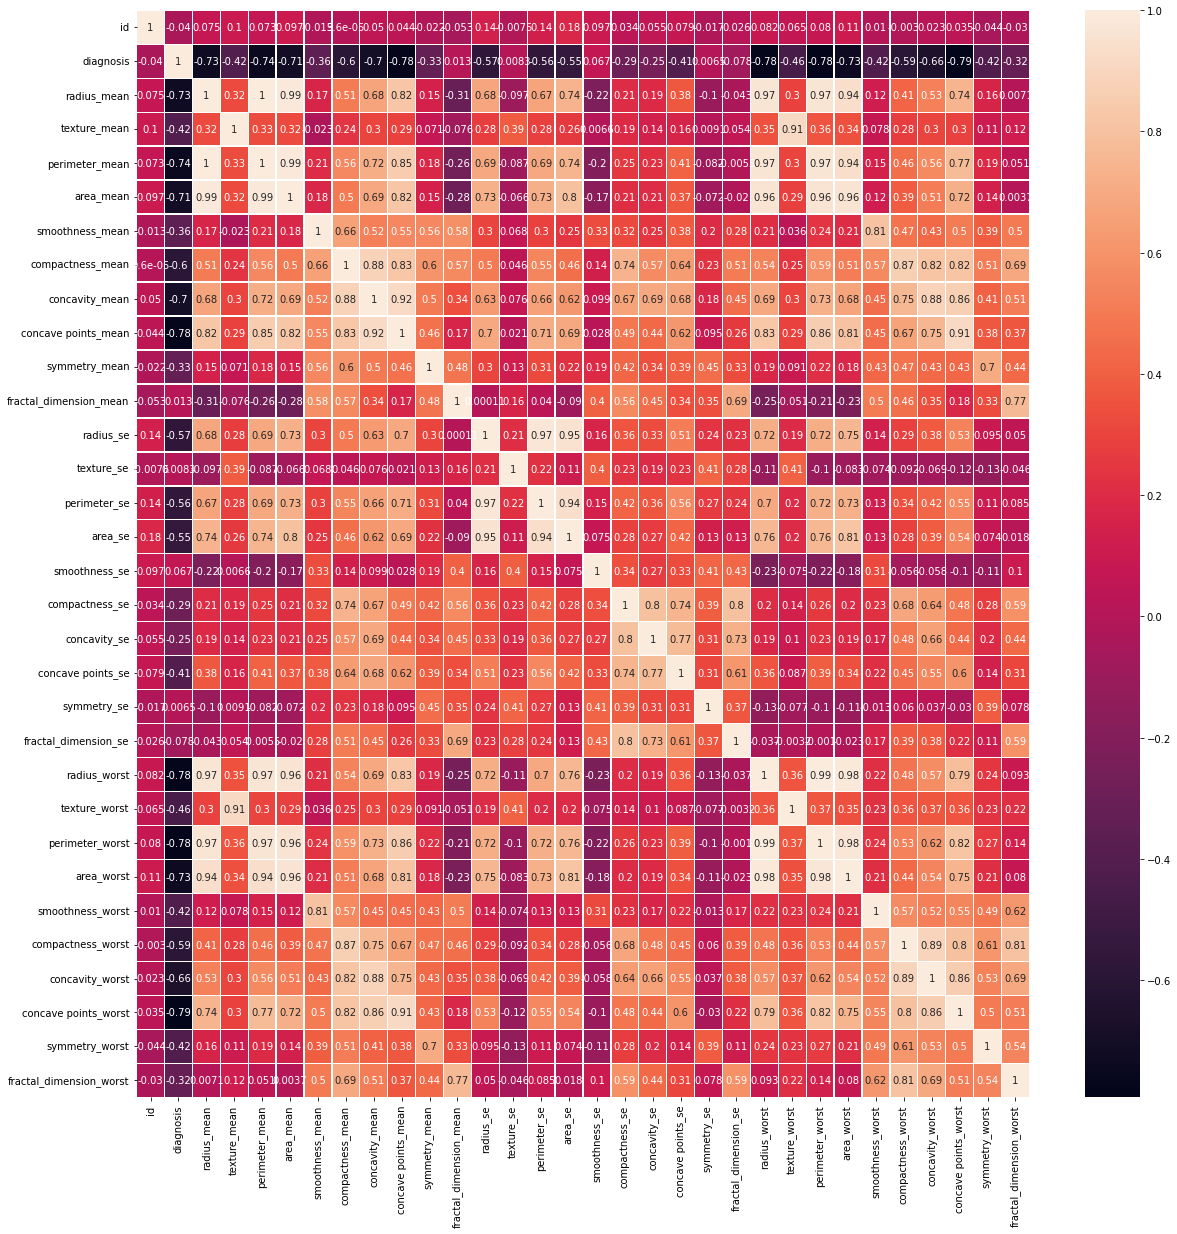

In [58]:
corrmax = data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corrmax,annot=True, linewidths=0.3)

In [166]:
# The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y.
# Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.
# Correlations of -1 or +1 imply a determinative relationship.

pointbiserialr_dict = {k:[] for k in data.columns}
for col in data.columns:
  pointbiserialr_dict[col].append(stats.pointbiserialr(data['diagnosis'], data[col]).correlation)

cor_ = pd.DataFrame(pointbiserialr_dict).T
cor_.columns = ['corelation']
np.abs(cor_).sort_values(by='corelation', ascending=False)

,corelation
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [168]:
print('15 most important feature based on pearson correlation:\n')
np.abs(corrmax['diagnosis']).sort_values(ascending=False)[1:16]

15 most important feature based on pearson correlation:



concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
Name: diagnosis, dtype: float64

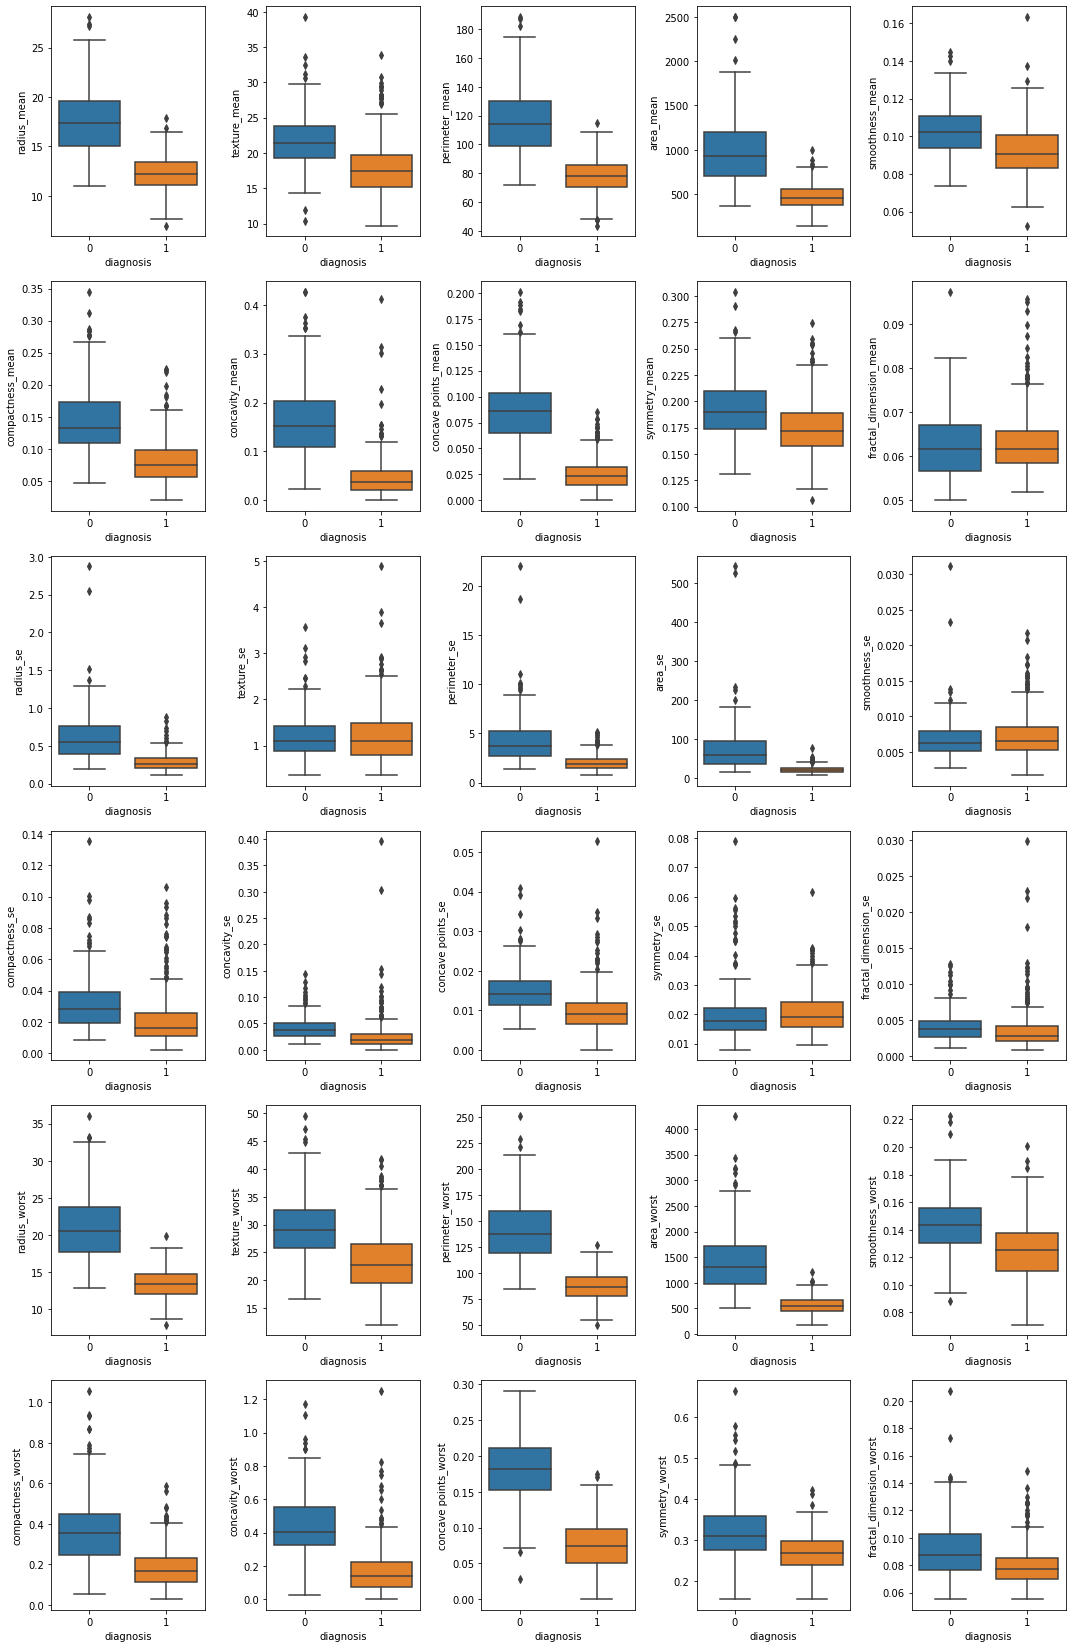

In [124]:
cols = data.columns.to_list()
del cols[0:2]

plt.figure(figsize=(15,23))
for i, col in enumerate(cols):
    plt.subplot(6,5,i+1)
    sns.boxplot(x = 'diagnosis', y = col, data=data)
    plt.ylabel(col)
    plt.xlabel('diagnosis')
plt.tight_layout()
plt.show()


In [132]:
def plot_feature(feat_1, feat_2):
  sns.scatterplot(data=data, x=feat_1, y=feat_2, hue='diagnosis', style="diagnosis")
  plt.show()

In [134]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

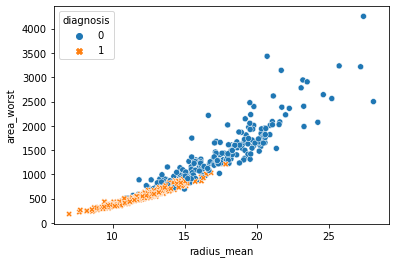

In [135]:
plot_feature('radius_mean', 'area_worst')